In [24]:
##Analysis
#1. Urban cities make up the bulk of rides, and by extension drivers. Two-thirds of the fares occur in urban areas.
#2. Rural fares, though fewer than suburban or urban fares, usually cost more per trip and only make up five percent of the total rides.
#3. Suburban rides make up a about quarter of the total rides and one third of the total fares. 

In [25]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
#City data
city_data_df = (pd.read_csv(city_data_to_load, encoding="ISO-8859-1"))
city_data_df.head

#clean city data
city_data_df.dropna(how = "any")

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [26]:
#Ride data
ride_data_df = (pd.read_csv(ride_data_to_load, encoding="ISO-8859-1"))
ride_data_df.head

#clean ride data
ride_data_df.dropna(how = "any")

#dedupe ride_id
ride_data_df.drop_duplicates("ride_id",keep='first', inplace=False)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [27]:
# Combine the data into a single dataset
working_data_set_df = pd.merge(city_data_df, ride_data_df, on = "city", how = "outer")

#clean singe dataset
working_data_set_df.dropna(how = "any")

# Display the data table for preview
working_data_set_df


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [28]:
#average fare per city $
mean_fare = round(working_data_set_df.groupby("city")["fare"].mean(),2)
mean_fare.describe

<bound method NDFrame.describe of city
Amandaburgh             24.64
Barajasview             25.33
Barronchester           36.42
Bethanyland             32.96
Bradshawfurt            40.06
Brandonfort             35.44
Carriemouth             28.31
Christopherfurt         24.50
Colemanland             30.89
Davidfurt               32.00
Deanville               25.84
East Aaronbury          25.66
East Danielview         31.56
East Kaylahaven         23.76
East Kentstad           29.82
East Marymouth          30.84
Erikaland               24.91
Garzaport               24.12
Grahamburgh             25.22
Grayville               27.76
Harringtonfort          33.47
Huntermouth             28.99
Hurleymouth             25.89
Jerryton                25.65
Jessicaport             36.01
Johnton                 26.79
Joneschester            22.29
Josephside              32.86
Justinberg              23.69
Karenberg               26.34
                        ...  
South Evanton           26.73
S

In [29]:
#Total number of rides per city
rides_per_city = working_data_set_df.groupby("city")["ride_id"].count()
rides_per_city

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [30]:
#Total number of drivers per city
drivers_per_city = working_data_set_df.groupby("city")["driver_count"].mean()
drivers_per_city

city
Amandaburgh             12
Barajasview             26
Barronchester           11
Bethanyland             22
Bradshawfurt             7
Brandonfort             10
Carriemouth             52
Christopherfurt         41
Colemanland             23
Davidfurt               23
Deanville               49
East Aaronbury           7
East Danielview         22
East Kaylahaven         65
East Kentstad           20
East Marymouth           5
Erikaland               37
Garzaport                7
Grahamburgh             61
Grayville                2
Harringtonfort           4
Huntermouth             37
Hurleymouth             36
Jerryton                64
Jessicaport              1
Johnton                 27
Joneschester            39
Josephside              25
Justinberg              39
Karenberg               22
                        ..
South Evanton           11
South Jack              46
South Jennifer           7
South Karenland          4
South Latoya            10
South Marychester      

In [31]:
#City type
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [32]:
# #creating a dataframe of each category
# working_dataframe = pd.DataFrame({"Average Fare per City": mean_fare,
#                                  "Number of rides": rides_per_city,
#                                  "City type": city_type})
# working_dataframe.head()

#DataFrame of the city, drivers, and fares by community context
Pyber_data = pd.DataFrame({
    "Average fare": mean_fare,
    "rides per city": rides_per_city,
    "Drivers per city": drivers_per_city,
    "Community context": city_type,
})

Pyber_data


,Average fare,rides per city,Drivers per city,Community context
Amandaburgh,24.64,18,12,Urban
Barajasview,25.33,22,26,Urban
Barronchester,36.42,16,11,Suburban
Bethanyland,32.96,18,22,Suburban
Bradshawfurt,40.06,10,7,Rural
Brandonfort,35.44,19,10,Suburban
Carriemouth,28.31,27,52,Urban
Christopherfurt,24.50,27,41,Urban
Colemanland,30.89,22,23,Suburban
Davidfurt,32.00,17,23,Suburban


In [33]:
#Obtain the x and y coordinates for each of the three city types
Pyber_data

#Community context = Urban
Urban = Pyber_data.loc[Pyber_data["Community context"]== "Urban"]

#Community context = Suburban
Suburban = Pyber_data.loc[Pyber_data["Community context"]== "Suburban"]

#Community context = Rural
Rural = Pyber_data.loc[Pyber_data["Community context"]== "Rural"]

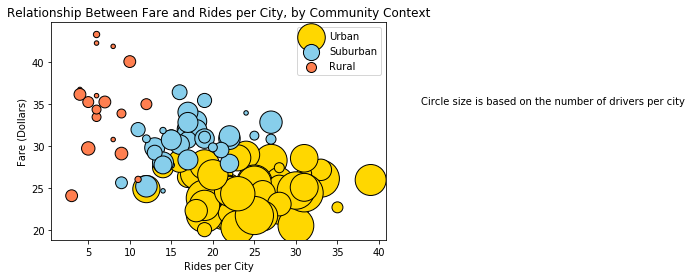

In [34]:
#Build the scatter plots for each city types

# Incorporate the other graph properties
#Urban scatterplot
plt.scatter(Urban["rides per city"], Urban["Average fare"], color="Gold", edgecolors="black", s=Urban["Drivers per city"]*20, label = "Urban")


#Suburban scatterplot
plt.scatter(Suburban["rides per city"], Suburban["Average fare"],color = "SkyBlue", edgecolors="black", s=Suburban["Drivers per city"]*20, label="Suburban")

#Rural scatterplot
plt.scatter(Rural["rides per city"], Rural["Average fare"],color = "Coral", edgecolors="black", s=Rural["Drivers per city"]*20, label = "Rural")



# Create a title, x label, and y label for our chart
plt.title("Relationship Between Fare and Rides per City, by Community Context")
plt.xlabel("Rides per City")
plt.ylabel("Fare (Dollars)")

#add legend
plt.legend(loc="best")


#show plot
#plt.show()
# Incorporate a text label regarding circle size
plt.text(45,35,"Circle size is based on the number of drivers per city")
plt.savefig("..//Pyber_chart.png")
plt.show()


## Total Fares by City Type

In [37]:
# Calculate Type Percents
#community_context_pie = Pyber_data.groupby(["Community context"])["Average fare"].sum()
#community_context_pie

#Sum city by community context
community_context_pie2 = Pyber_data.groupby("Community context")["Average fare"].sum()
community_context_pie2

community_context_pie2.index



Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='Community context')

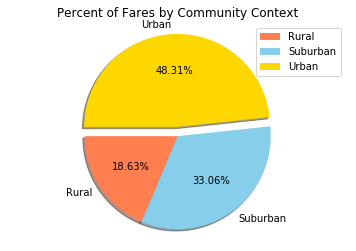

In [41]:
#Set colors by community context
colors = ["Coral", "SkyBlue", "Gold"]

#explore chart section
explode = (0,0, 0.1)

#Create the pie chart
plt.pie(community_context_pie2, labels = community_context_pie2.index, 
        autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 180)

#equal axis
plt.axis("equal")

#add legend
plt.legend(loc="best")

#Add title
plt.title("Percent of Fares by Community Context")


# Save Figure
plt.savefig("..//CommunityContext2_chart.png")

#show the chart
plt.show()


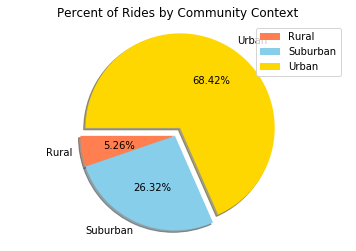

In [39]:
#* % of Total Rides by City Type

# Calculate Type Percents
#community_context_pie = Pyber_data.groupby(["Community context"])["Average fare"].sum()
#community_context_pie

#Sum city by community context
community_context_pie3 = working_data_set_df.groupby(["type"])["ride_id"].count()
community_context_pie3

community_context_pie3.index


#Set colors by community context
colors = ["Coral", "SkyBlue", "Gold"]

#explore chart section
explode = (0,0, 0.1)

#Create the pie chart
plt.pie(community_context_pie3, labels = community_context_pie2.index, 
        autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 180)

#equal axis
plt.axis("equal")

#add legend
plt.legend(loc="best")

#Add title
plt.title("Percent of Rides by Community Context")


# Save Figure
plt.savefig("..//CommunityContext3_chart.png")

#show the chart
plt.show()



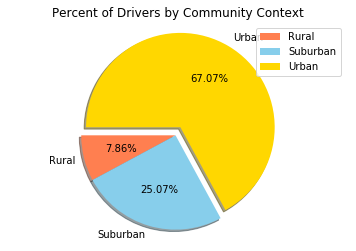

In [42]:
#Total Drivers by City type

#Sum city by community context
community_context_pie4 = working_data_set_df.groupby(["type"])["driver_count"].mean()
community_context_pie4

community_context_pie4.index


#Set colors by community context
colors = ["Coral", "SkyBlue", "Gold"]

#explore chart section
explode = (0,0, 0.1)

#Create the pie chart
plt.pie(community_context_pie4, labels = community_context_pie2.index, 
        autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 180)

#equal axis
plt.axis("equal")

#add legend
plt.legend(loc="best")

#Add title
plt.title("Percent of Drivers by Community Context")


# Save Figure
plt.savefig("..//CommunityContext4_chart.png")

#show the chart
plt.show()